In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', context='talk')

%matplotlib inline

In [2]:
data=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\hu_12_formations_points.csv')

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


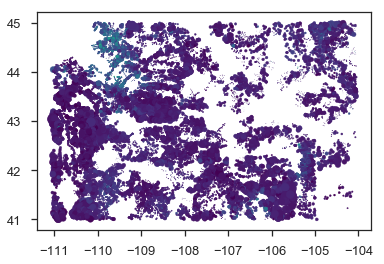

In [3]:
plt.scatter(data['longitude'], data['latitude'], c=data['co_ppm'], s=data['Alluvium and colluvium'], cmap='viridis')

In [4]:
data.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'u_dn_ppm', 'u_fl_ppm', 'ag_ppm',
       'al_pct', 'as_ppm', 'au_ppm', 'b_ppm', 'ba_ppm', 'be_ppm',
       'bi_ppm', 'ca_pct', 'cd_ppm', 'ce_ppm', 'cl_ppm', 'co_ppm',
       'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'eu_ppm', 'fe_pct',
       'hf_ppm', 'k_pct', 'la_ppm', 'li_ppm', 'lu_ppm', 'mg_pct',
       'mn_ppm', 'mo_ppm', 'na_pct', 'nb_ppm', 'ni_ppm', 'p_ppm',
       'pb_ppm', 'rb_ppm', 'sb_ppm', 'sc_ppm', 'se_ppm', 'sm_ppm',
       'sn_ppm', 'sr_ppm', 'ta_ppm', 'tb_ppm', 'th_ppm', 'ti_ppm',
       'v_ppm', 'w_ppm', 'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm',
       'longitude', 'latitude', 'geometry', 'index_right', 'AREA',
       'PERIMETER', 'WY_HU12_', 'WY_HU12_ID', 'HUC_8', 'HUC_10', 'HUC_12',
       'ACRES', 'STATES', 'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME',
       'HU_10_MOD', 'HU_10_TYPE', 'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD',
       'HU_12_TYPE', 'HU_2_NAME', 'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME',
       'Shape_Leng', 'Shape_Area', 'area',
   

(0.1, 100)

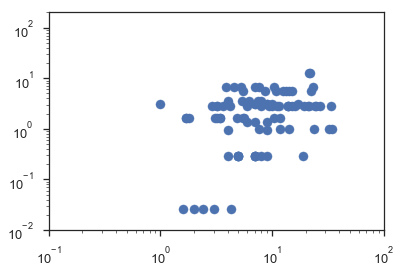

In [47]:
plt.scatter(data['co_ppm'], data['Absaroka Volcanic Supergroup: Hominy Peak Formation'])
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.01,200)
plt.xlim(0.1,100)

In [11]:
data.iloc[0:10,82:87]

,Absaroka Volcanic Supergroup: Hominy Peak Formation,Absaroka Volcanic Supergroup: Sunlight Group - Trout Peak Trachyandesite,"Absaroka Volcanic Supergroup: Sunlight Group - Trout Peak Trachyandesite, Wapiti Formation, Crescent Hill Basalt, and Mount Wallace Formation",Absaroka Volcanic Supergroup: Sunlight Group - Wapiti Formation,Absaroka Volcanic Supergroup: Thorofare Creek Group - Aycross Formation
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0


In [10]:
cobalt=[]
for i in range(208):
    cobalt.append(data['co_ppm'].corr(data.iloc[0:,82+i]))

Text(0.5,1,'Correlation of Cobalt and Formations')

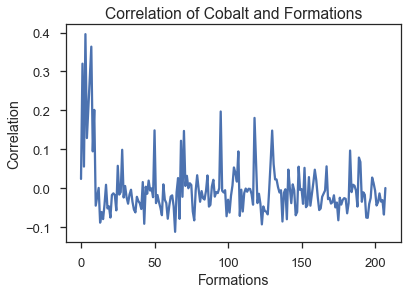

In [19]:
plt.plot(cobalt)
plt.xlabel('Formations')
plt.ylabel('Correlation')
plt.title('Correlation of Cobalt and Formations')

In [6]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

In [8]:
X = data.iloc[0:, 2:55].values
y = data.iloc[0:,82:].values

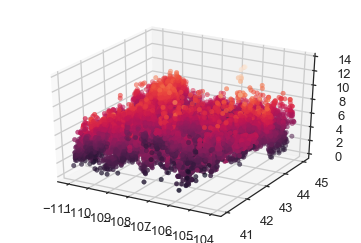

In [38]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(data['longitude'].values, data['latitude'].values, data['al_pct'].values, c=data['al_pct'].values)

In [41]:
from sklearn.cluster import Birch
brc=Birch(branching_factor=50, n_clusters=10, threshold=0.9, compute_labels=True)


In [83]:
combined=list(zip(data['longitude'].values, data['latitude'].values, data['b_ppm'].values))
brc.fit(combined)
clusters=brc.predict(combined)

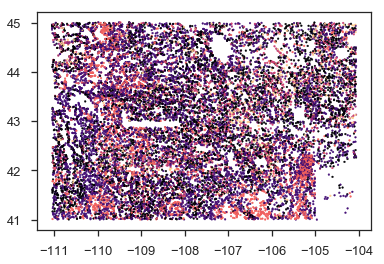

In [84]:
plt.scatter(data['longitude'], data['latitude'], c=clusters, s=3, cmap='magma')

In [200]:
combined=data.iloc[0:,2:46]

from sklearn.decomposition import PCA
xpca=PCA(0.5).fit_transform(combined)
xpca.shape

(18421, 2)

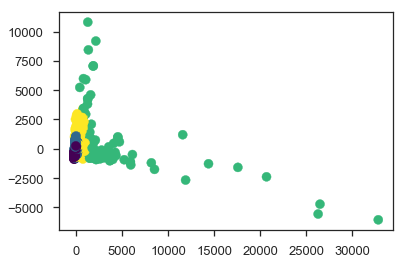

In [270]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(4, covariance_type='full', random_state=0)
gmm.fit(xpca)
cluster_label = gmm.predict(xpca)
plt.scatter(xpca[:, 0], xpca[:, 1], c=cluster_label, cmap='viridis');

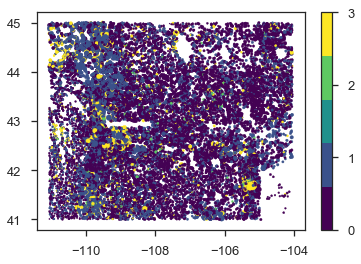

In [271]:
plt.scatter(data['longitude'], data['latitude'], s=data['ti_ppm']/500, c=cluster_label, cmap=plt.cm.get_cmap('viridis',5))
cb= plt.colorbar(ticks=range(5))
cb.set_ticklabels(['0','1','2','3','4'])

In [273]:
data['cluster label']=cluster_label

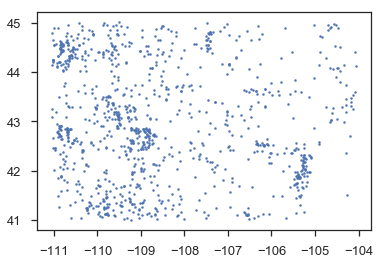

In [275]:
plt.scatter(data[data['cluster label']==3]['longitude'], data[data['cluster label']==3]['latitude'], s=4)

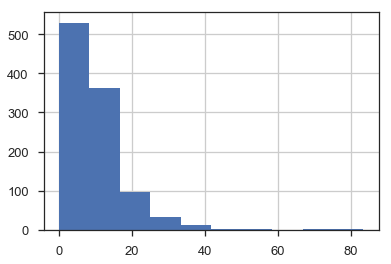

In [276]:
data[data['cluster label']==3]['co_ppm'].hist()

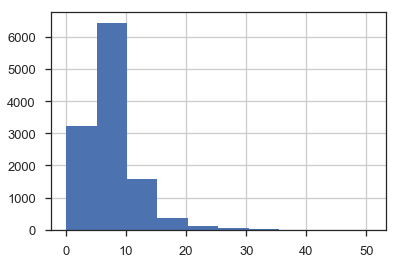

In [279]:
data[data['cluster label']==0]['co_ppm'].hist()